# Sandwich Shop Simulation
Here we look at the case of a restaurant modeling its operations.  We can
see how the different parameter settings affect the average profit.

In [1]:
# Import necessary packages
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import time

## Sandwich Shop Parameters
* A sandwich shop orders $O$ sandwiches each day
* At a fixed price of $W$ dollars.  
* Sell price of $R$ dollars.  
* The demand for sandwiches, $D$, is a random variable that is $\mathcal{U}\{5, 6, \ldots, 35\}$.  

How much profit will be made on average? We may simulate $n$ replications of $4$ consecutive days:


In [2]:
whole = 1  # wholesale price of sandwich
retail = 5 # retail price of sandwich
order = 20 # quantity of sandwiches ordered daily
demandlo = 5 # lo end of demand
demandhi = 35 # hi end of demand
ndays = 3*365 # number of days for simulation
ndvec = range(1,ndays+1)  # vector of 1 to number of days
nreps = 10000 # number of replications
nrvec = range(1,nreps+1) # number of replications of the simulation

## Perform Simulation
* The number of sandwiches sold, $S$, is the minimum of the demand, and the number ordered
$$S = \min (D,O).$$
* The profit, $P$ each day is the difference between the income and the expense:
$$P = S \times R - O \times W$$

In our case we are computing $P_{ij}$ for $i=1, \ldots, n$ and $ = 1, \ldots, m$.  Then we compute the average profit of $m$ days for each run $i$

In [3]:
demand = np.random.randint(demandlo,demandhi+1,[nreps,ndays]) # uniform random numbers for demand
sold = np.minimum(demand,order) # amount of sandwiches sold that day
dayprofit = sold*retail-order*whole # profit for the day
avgprofitrun = np.mean(dayprofit, axis = 1) # average profit for the first m days
avgprofit= np.mean(dayprofit)  # average profit over all runs and days

## Output Results
We output the results of our simulation.  Notice how the sample average
converges as the number of replications increases.

In [7]:
#Numerical output

print("For", nreps, "replications of", ndays, "days of business, \n",
      "sandwiches costing $", whole, " a piece and sold for $",retail, "a piece.") 
print("For a supply of ", order, " sandwiches ordered daily and a random demand\n"
       "that is uniform over a range of {", demandlo, ",",demandhi,"} sandwiches" )
print("The average daily profit over this whole time = $", f"{avgprofit:.2f}", "\n"
      "compared to the maximum possible profit of $",order*(retail-whole))

For 10000 replications of 1095 days of business, 
 sandwiches costing 1  a piece and sold for $ 5 a piece.
For a supply of  20  sandwiches ordered daily and a random demand
that is uniform over a range of { 5 , 35 } sandwiches
The average daily profit over this whole time = $ 60.65 
compared to the maximum possible profit of $ 80


Text(0, 0.5, 'Avg Daily Profit')

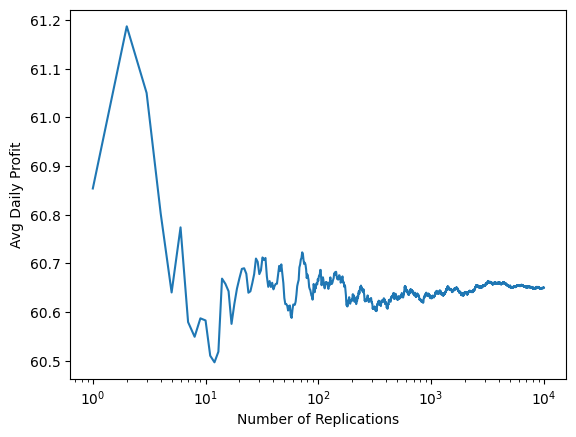

In [66]:
# Plot daily and cumulative average profit
plt.figure()
plt.semilogx(nrvec,np.cumsum(avgprofitrun)/nrvec)
plt.xlabel('Number of Replications')
plt.ylabel('Avg Daily Profit')


## Saving sandwiches
In the above example, the daily profits are independent random variables.
Suppose that we consider the case where sandwiches may be saved for one
day, and we sell the old sandwiches first.  Then the daily profits are  _dependent_ random variables. The formulas change as follows 

\begin{gather*}
 S_{i1} = \min(D_{ij},O), \quad
 S_{ij} = \min(D_{ij},O + R_{i,j-1}), \qquad j = 2, 3, \ldots, m \\
 R_{ij} = O + \min(R_{i,j-1} - S_{ij},0) = \begin{cases}
 O, & S_{ij} \le R_{i,j-1}, \\ O + R_{i,j-1} -  S_{ij}, 
 & S_{ij} > R_{i,j-1}, \end{cases} \qquad j = 1, 2, \ldots, m.
\end{gather*}

The modified simulation is as follows

In [10]:
sold[:,0] = np.minimum(demand[:,0],order)
remain = np.zeros((nreps,ndays))
remain[:,0] = order -sold[:,0]
for j in range(1,ndays):
    sold[:,j] = np.minimum(demand[:,j],order + remain[:,j-1])
    remain[:,j] = order + np.minimum(remain[:,j-1]-sold[:,j],0) #cannot keep sandwiches more than one day

dayprofit = sold*retail-order*whole # profit for the day
avgprofitrun = np.mean(dayprofit, axis = 1) # average profit for the first m days
avgprofit= np.mean(dayprofit)  # average profit over all runs and days

In [11]:
#Numerical output

print("For", nreps, "replications of", ndays, "days of business, \n",
      "sandwiches costing $", whole, " a piece and sold for $",retail, "a piece.") 
print("For a supply of ", order, " sandwiches ordered daily and a random demand\n"
       "that is uniform over a range of {", demandlo, ",",demandhi,"} sandwiches" )
print("The average daily profit over this whole time = $", f"{avgprofit:.2f}", "\n"
      "compared to the maximum possible profit of $",order*(retail-whole))

For 10000 replications of 1095 days of business, 
 sandwiches costing 1  a piece and sold for $ 5 a piece.
For a supply of  20  sandwiches ordered daily and a random demand
that is uniform over a range of { 5 , 35 } sandwiches
The average daily profit over this whole time = $ 73.14 
compared to the maximum possible profit of $ 80


Text(0, 0.5, 'Avg Daily Profit')

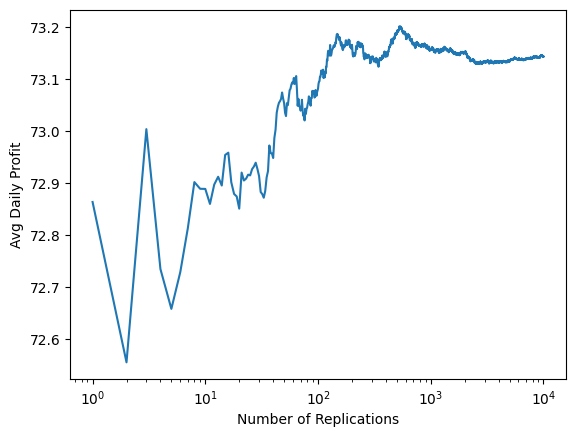

In [12]:
# Plot daily and cumulative average profit
plt.figure()
plt.semilogx(nrvec,np.cumsum(avgprofitrun)/nrvec)
plt.xlabel('Number of Replications')
plt.ylabel('Avg Daily Profit')


## Comparing Profits for Different Orders and Wholesale Costs
Let's run the simulation for a variety of parameters:

In [13]:
Ovec = list(range(demandlo,demandhi+1,5)) #vector of possible order sizes
Wvec = list(range(1,5)) #vector of possible wholesale prices
nO = len(Ovec) # number of possible order sizes
nW = len(Wvec) # number of possible wholesale prices
demand = np.random.randint(demandlo,demandhi+1,[nreps,ndays]) # uniform random numbers for demand
avgprofitThrowAway = np.zeros((nO,nW))
avgprofitKeep = avgprofitThrowAway
soldKeep = np.zeros((nreps,ndays))
for ii in range(nO):
    order = Ovec[ii]
    for jj in range(nW):
        # First the simulation where we throw away unsold sandwiches
        whloe = Wvec[jj]
        soldThrowAway = np.minimum(demand,order)
        avgprofitThrowAway[ii,jj] = np.mean(soldThrowAway * retail - order * whole)
        # Next the similuation where we kepp unsold sandwiches one day
        soldKeep[:,0] = np.minimum(demand[:,0],order)
        remain[:,0] = order - soldKeep[:,0] # andwiches leftover
        for j in range(1,ndays):
            soldKeep[:,j] = np.minimum(demand[:,j],order + remain[:,j-1]) #amount of sandwiches sold that day
            remain[:,j] = order + np.minimum(remain[:,j-1] - soldKeep[:,j],0)  # cannot keep sandwiches more than one day
        avgprofitKeep[ii,jj] = np.mean(soldKeep*retail-order*whole) # avg daily profit



In [16]:
print(avgprofitKeep)
print(Ovec)

[[20.         20.         20.         20.        ]
 [39.97714155 39.97714155 39.97714155 39.97714155]
 [59.07661507 59.07661507 59.07661507 59.07661507]
 [73.12801644 73.12801644 73.12801644 73.12801644]
 [74.76829726 74.76829726 74.76829726 74.76829726]
 [69.99387717 69.99387717 69.99387717 69.99387717]
 [64.99676164 64.99676164 64.99676164 64.99676164]]
[5, 10, 15, 20, 25, 30, 35]


In [15]:
print(avgprofitThrowAway)

[[20.         20.         20.         20.        ]
 [39.97714155 39.97714155 39.97714155 39.97714155]
 [59.07661507 59.07661507 59.07661507 59.07661507]
 [73.12801644 73.12801644 73.12801644 73.12801644]
 [74.76829726 74.76829726 74.76829726 74.76829726]
 [69.99387717 69.99387717 69.99387717 69.99387717]
 [64.99676164 64.99676164 64.99676164 64.99676164]]


In [88]:
# print a table
print('Avg Daily Profit | Order Quantity')
print(' Wholesale Price |',Ovec)
for jj in range(nW):
   print('Throw Away $| ',Wvec[jj])
   print('   ',avgprofitThrowAway[:,jj])
   print('Keep       $| ',Wvec[jj])
   print('  ',avgprofitKeep[:,jj])




Avg Daily Profit | Order Quantity
 Wholesale Price | [5, 10, 15, 20, 25, 30, 35]
Throw Away $|  1
    [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Keep       $|  1
   [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Throw Away $|  2
    [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Keep       $|  2
   [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Throw Away $|  3
    [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Keep       $|  3
   [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Throw Away $|  4
    [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
Keep       $|  4
   [20.         39.97746804 59.07597169 73.13709589 74.78357717 70.00662511
 65.00961781]
